# PRACTICING WITH DARTS

In this activity we are going to practice the concepts of Time Series and the **DARTS** library.

https://unit8co.github.io/darts/

You can work locally by installing in your computer the library. We also can need the **scipy** library for Fourier frequency analysis.

In [46]:
# !pip install darts

## DATASETS with multiple series

Store Item Demand Forecasting (Kaggle)

https://www.kaggle.com/c/demand-forecasting-kernels-only

**Note**: This dataset has been synthetically generated through simulation. It would be relatively easy to find the functions used for generating them.

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
df_demand = pd.read_csv('https://krono.act.uji.es/IDIA/demand-forecasting-train.csv', parse_dates=['date'])

In [49]:
df_demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   store   913000 non-null  int64         
 2   item    913000 non-null  int64         
 3   sales   913000 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 27.9 MB


We can organize the series by *item*, by *store* or to get the *total* sales for all products and stores.

For example, if we want to obtain the time series by product we pivot as follows:

`df_pivt = df_demand.pivot_table(index=['date'], columns='item', values='sales', aggfunc='sum')`

In this activity, we will deal with the *totals* time series (**the sum of all the items over all the stores at each time**).

<Axes: xlabel='date'>

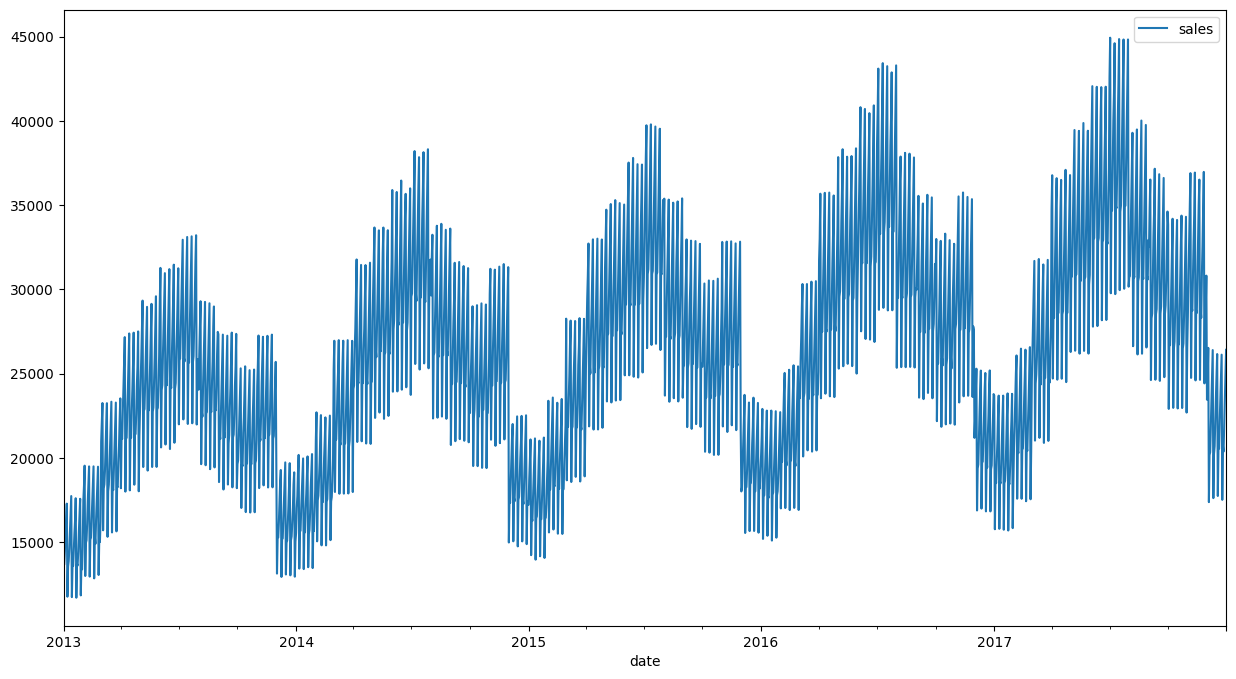

In [50]:
## CODE HERE
# serie de suma de todas las tiendas en todos los productos
df_pvt = df_demand.groupby("date").agg({"sales":"sum"})
# df_pvt = df_pvt[]
df_pvt.plot(figsize=(15,8))

<Axes: xlabel='date'>

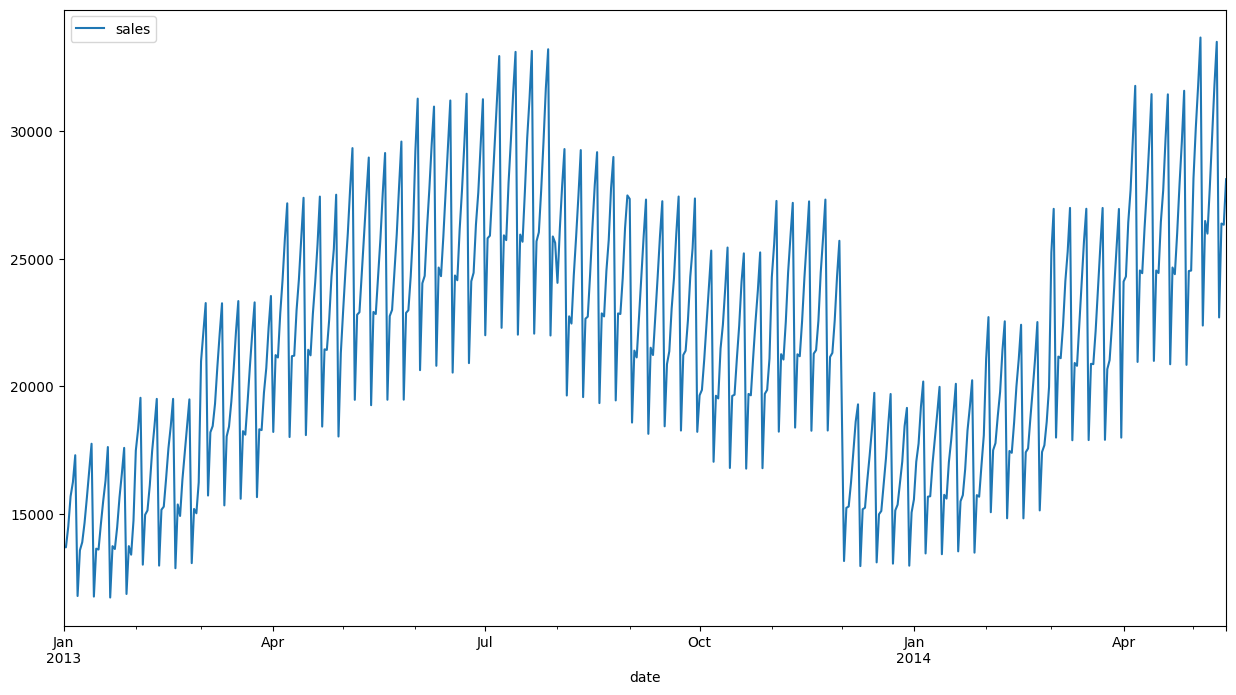

In [51]:
# in detail:
df_pvt[:500].plot(figsize=(15,8))

## Decomposition of the time series
* Trend
* Cycles
* Seasons
* White noise

### TREND

Determine which is the trend of the time series. Is it stationary?

/tmp/ipykernel_48753/1289634293.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  pvt_trend = df_pvt.resample('2Y').mean()
/tmp/ipykernel_48753/1289634293.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  trend_slope = (pvt_trend["sales"][-1] - pvt_trend["sales"][0]) / (len(pvt_trend["sales"]) * 2 - 1)


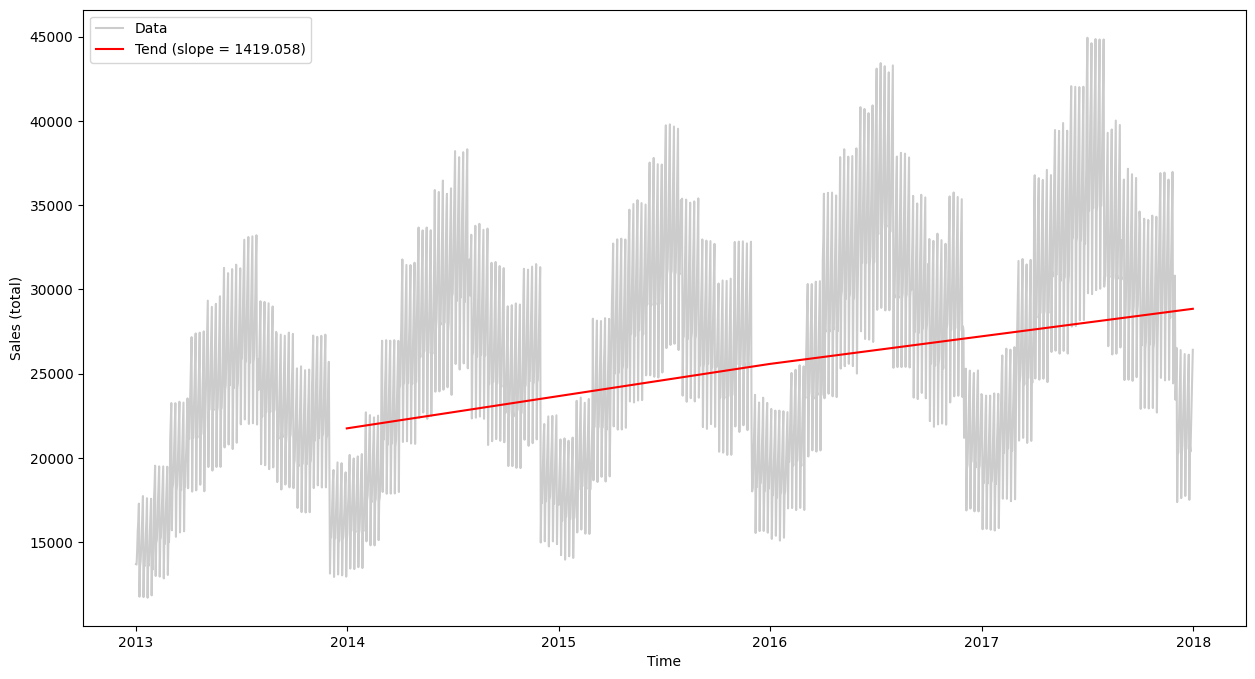

[[[[[ Data has a slope of about 1419.058 total sales a year ]]]]]]


In [59]:
pvt_trend = df_pvt.resample('2Y').mean()

slope = 0

trend_slope = (pvt_trend["sales"][-1] - pvt_trend["sales"][0]) / (len(pvt_trend["sales"]) * 2 - 1)

plt.figure(figsize=(15,8))
plt.plot(df_pvt, label="Data", color="black", alpha=0.2)
plt.plot(pvt_trend, label=f"Tend (slope = {np.round(trend_slope, 4)})", color="red")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Sales (total)")
plt.show()

[introduce explanation here]

### CYCLES

With the auto-correlation plot (AC), and Fourier analysis we aim to indentify the main cycles of the time series.

In [ ]:
## CODE HERE

[introduce explanation here]

### NORMALIZATION

Check different methods for **normalization** and choose the best for performing a forecast.

In [ ]:
## CODE HERE

[introduce explanation here]


## TIME SERIES FORECAST

Train **two forecasting models** for predicting the time series, one classical and another based on neural networks. Evaluate their quality with MAPE/RMSE metric.

You can use any of the models provided by DARTS:

https://unit8co.github.io/darts/#forecasting-models


In [ ]:
## CODE HERE

[introduce explanation of *results* here]